In [65]:
import matplotlib.pyplot as plt
import numpy as np

import gpflow

11 11
(11, 2)


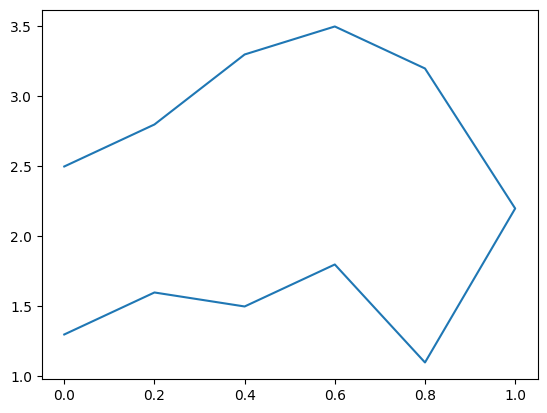

In [66]:
# Percentage distance around the polygon relative to starting point
X = np.linspace(0, 1, 11)

# Output points of the polygon at percentage distance
Y = np.array(
    [
        [0.0, 1.3], [0.2, 1.6], [0.4, 1.5], [0.6, 1.8], [0.8, 1.1], [1.0, 2.2],
        [0.8, 3.2], [0.6, 3.5], [0.4, 3.3], [0.2, 2.8], [0.0, 2.5],
    ]
)

print(len(X), len(Y))
print(np.shape(Y))
plt.plot(Y[:, 0], Y[:, 1])

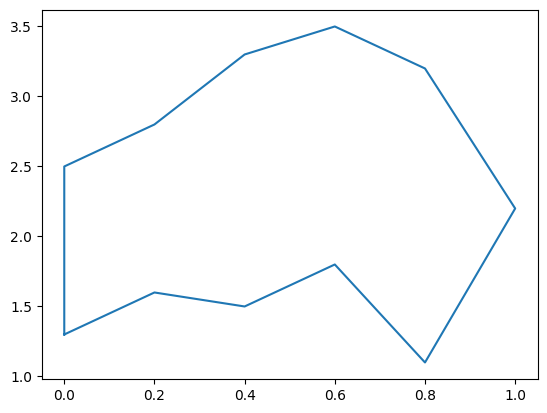

In [67]:
# Find heading to next point
starting_point = Y[0, :]
next_point = np.roll(Y, -1, axis=0)
headings = np.arctan2(next_point[:, 1] - Y[:, 1], next_point[:, 0] - Y[:, 0])

# Find lengths to next point
lengths = np.linalg.norm(np.roll(Y, -1, axis=0) - Y, axis=1)

# Find path
out_Y = np.zeros((len(X) + 1, 2))
out_Y[0, :] = starting_point
for i in range(len(lengths)):
    out_Y[i + 1, 0] = out_Y[i, 0] + np.cos(headings[i]) * lengths[i]
    out_Y[i + 1, 1] = out_Y[i, 1] + np.sin(headings[i]) * lengths[i]

# Plot
plt.plot(out_Y[:, 0], out_Y[:, 1])


In [80]:
print(np.shape(X), np.shape(headings))
X = np.reshape(X, (11, 1))
headings = np.reshape(headings, (11, 1))
print(np.shape(X), np.shape(headings))
model = gpflow.models.GPR(
    (X, headings),
    kernel=gpflow.kernels.SquaredExponential(),
)

(1, 11) (1, 11)
(11, 1) (11, 1)


In [81]:
opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 20.421422647438952
        x: [-1.935e+00  1.080e+00  1.104e+00]
      nit: 15
      jac: [-3.613e-08  1.828e-06  3.107e-06]
     nfev: 19
     njev: 19
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [82]:
Xplot = np.linspace(0.0, 1.0, 100)[:, None]
f_mean, f_var = model.predict_f(Xplot, full_cov=False)
y_mean, y_var = model.predict_y(Xplot)

In [83]:
f_lower = f_mean - 1.96 * np.sqrt(f_var)
f_upper = f_mean + 1.96 * np.sqrt(f_var)
y_lower = y_mean - 1.96 * np.sqrt(y_var)
y_upper = y_mean + 1.96 * np.sqrt(y_var)

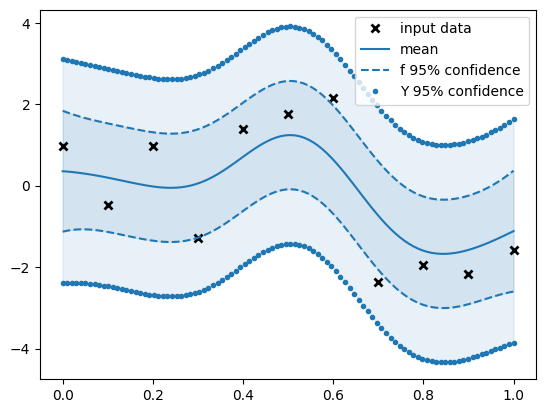

In [85]:
plt.plot(X, headings, "kx", mew=2, label="input data")
plt.plot(Xplot, f_mean, "-", color="C0", label="mean")
plt.plot(Xplot, f_lower, "--", color="C0", label="f 95% confidence")
plt.plot(Xplot, f_upper, "--", color="C0")
plt.fill_between(
    Xplot[:, 0], f_lower[:, 0], f_upper[:, 0], color="C0", alpha=0.1
)
plt.plot(Xplot, y_lower, ".", color="C0", label="Y 95% confidence")
plt.plot(Xplot, y_upper, ".", color="C0")
plt.fill_between(
    Xplot[:, 0], y_lower[:, 0], y_upper[:, 0], color="C0", alpha=0.1
)
plt.legend()